# Topological sorting

## How to run?

All the animations in this notebook are rendered by the [algviz](https://zjl9959.github.io/algviz/) algorithm animation engine in real time. You can follow this [guidance](https://zjl9959.github.io/algviz/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

In [1]:
import algviz

nodes = [i for i in range(16)]
edges = [
    (0, 1, None), (0, 2, None), (0, 3, None), (0, 4, None), (0, 5, None),
    (1, 6, None), (2, 7, None), (3, 8, None), (3, 9, None), (4, 10, None),
    (4, 11, None), (4, 12, None), (5, 12, None), (7, 6, None), (8, 13, None), (15, 6, None),
    (9, 14, None), (10, 15, None), (11, 15, None), (13, 14, None), (15, 14, None), (12, 6, None)
]
graph_nodes = algviz.parseGraph(nodes, edges)

## Depth first search

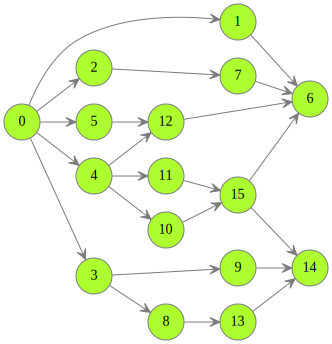

Result:

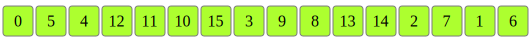

In [2]:
class Solution:
    def topologicalSortingDfs(self, parent, node):
        self.visited.add(node)
        self.graph.markNode(algviz.cTan, node, True)
        self.graph.markEdge(algviz.cTan, parent, node)
        self.viz.display(0.5)
        for v in node.neighbors():
            if v[0] not in self.visited:
                self.topologicalSortingDfs(node, v[0])
        self.stack.insert(0, node)
        self.stack.mark(algviz.cGreenYellow, 0)
        self.graph.markNode(algviz.cSilver, node, True)
        self.graph.markNode(algviz.cGreenYellow, node)
        self.viz.display()

    def topologicalSorting(self, graph):
        self.viz = algviz.Visualizer(0.7)
        self.graph = self.viz.createGraph(list(graph.values()))
        self.visited = set()
        self.stack = self.viz.createVector(cell_size=(30, 30), show_index=False, name='Result')
        for node in graph.values():
            if node not in self.visited:
                self.topologicalSortingDfs(None, node)

    def replay(self):
        self.graph.removeMarks([algviz.cTan, algviz.cSilver])
        self.viz.display()
        for i in range(len(self.stack)):
            node = self.stack[i]
            self.graph.markNode(algviz.cGreenYellow, node, True)
            self.stack.mark(algviz.cGreenYellow, i, hold=True)
            self.viz.display()

solver = Solution()
solver.topologicalSorting(graph_nodes)
solver.replay()

# Kahns algorithm

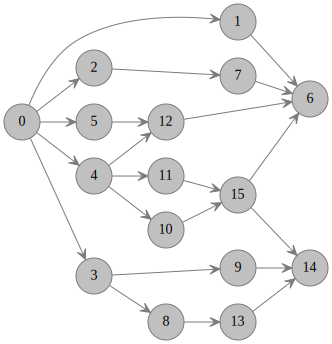

Nodes in-degree:

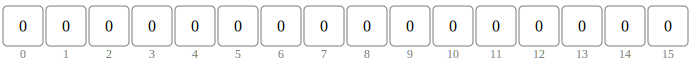

Zero in-degree nodes stack:

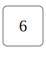

Result:

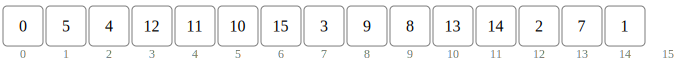

In [3]:
def topologicalSortingKahns(graph_nodes):
    # Calculate the degree of each node.
    viz = algviz.Visualizer(1)
    graph = viz.createGraph(data=list(graph_nodes.values()))
    degree = viz.createVector(name='Nodes in-degree')
    degree_index = dict()
    for node in graph_nodes.values():
        degree_index[node] = len(degree)
        degree.append(0)
    for u in graph_nodes.values():
        for v in u.neighbors():
            graph.markEdge(algviz.cTomato, u, v[0])
            graph.markNode(algviz.cTomato, v[0])
            degree[degree_index[v[0]]] += 1
            degree.mark(algviz.cTomato, degree_index[v[0]])
            viz.display(0.5)
    stack = viz.createVector(name='Zero in-degree nodes stack')
    # Put the point with in-degree 0 into the queue.
    for u in graph_nodes.values():
        if degree[degree_index[u]] == 0:
            graph.markNode(algviz.cSilver, u, True)
            stack.append(u)
            viz.display(0.5)
    # Take points, delete edges, add points.
    res = viz.createVector(name='Result')
    while len(stack) > 0:
        cur_node = stack.pop()
        res.append(cur_node)
        viz.display()
        for neighbor in cur_node.neighbors():
            v = neighbor[0]
            degree[degree_index[v]] -= 1
            graph.markEdge(algviz.cAqua, cur_node, v)
            graph.markNode(algviz.cAqua, v)
            degree.mark(algviz.cAqua, degree_index[v])
            viz.display()
            if degree[degree_index[v]] == 0:
                stack.append(v)
                graph.markNode(algviz.cSilver, v, True)
                viz.display()
    return res._data

res = topologicalSortingKahns(graph_nodes)